In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from config import TRAINING_DATA_DIR, EVALUATION_DATA_DIR, BASE_DIR

In [16]:
data_dict = pd.read_csv("data_dictionary.csv")
observation = pd.read_csv(TRAINING_DATA_DIR + "\\observation.csv")
gs = pd.read_csv(TRAINING_DATA_DIR + "\\goldstandard.csv")
observation.shape

(26674, 18)

In [17]:
drop_columns = [c for c in observation.columns if observation[c].isnull().sum() >=  observation.shape[0]]
observation = observation.drop(columns=drop_columns)
print("Dropped ", drop_columns)

Dropped  ['qualifier_concept_id', 'provider_id', 'visit_occurrence_id', 'visit_detail_id', 'observation_source_value', 'qualifier_source_value']


In [18]:
 observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26674 entries, 0 to 26673
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_id                      26674 non-null  int64  
 1   observation_id                 26674 non-null  int64  
 2   observation_concept_id         26674 non-null  int64  
 3   observation_date               26674 non-null  object 
 4   observation_datetime           26674 non-null  object 
 5   observation_type_concept_id    26674 non-null  int64  
 6   value_as_number                2691 non-null   float64
 7   value_as_string                21228 non-null  object 
 8   value_as_concept_id            21228 non-null  float64
 9   unit_concept_id                2691 non-null   float64
 10  observation_source_concept_id  26674 non-null  int64  
 11  unit_source_value              1279 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usag

In [19]:
# take all of the observation_concept_id as an array of indices.
observations = observation['observation_concept_id'].value_counts().index
print(observations)
d = {}
for obs in observations:
    value = data_dict[data_dict['concept_id'] == obs].concept_name.values[0]
    d[obs] = value
print(d)

Int64Index([37208405, 4005823, 4196147, 3003798, 1009229], dtype='int64')
{37208405: 'History of alcohol use', 4005823: 'Tobacco user', 4196147: 'Peripheral oxygen saturation', 3003798: 'Blood pressure method', 1009229: 'Cardiac rhythm'}


In [20]:
observation['observation_concept_id'] = observation['observation_concept_id'].map(d)

In [21]:
observation[observation['person_id'] == 1]

,person_id,observation_id,observation_concept_id,observation_date,observation_datetime,observation_type_concept_id,value_as_number,value_as_string,value_as_concept_id,unit_concept_id,observation_source_concept_id,unit_source_value
367,1,368,Peripheral oxygen saturation,2020-04-07,2020-04-07 14:41:00,3028553,96.0,NaN,NaN,8554.0,4196147,NaN
1704,1,1705,Tobacco user,2018-06-05,2018-06-05 14:41:00,38000280,NaN,Yes,4188539.0,NaN,4005823,NaN
2810,1,2811,Blood pressure method,2015-03-19,2015-03-19 14:41:00,3028553,NaN,NaN,NaN,NaN,3003798,NaN
4116,1,4117,History of alcohol use,2019-11-07,2019-11-07 14:41:00,38000280,NaN,Yes,4188539.0,NaN,37208405,NaN
5881,1,5882,History of alcohol use,2011-01-06,2011-01-06 14:41:00,38000280,NaN,Never,763692.0,NaN,37208405,NaN
7084,1,7085,History of alcohol use,2014-03-07,2014-03-07 14:41:00,38000280,NaN,No,4188540.0,NaN,37208405,NaN
9884,1,9885,Tobacco user,2013-02-28,2013-02-28 14:41:00,38000280,NaN,Never,763692.0,NaN,4005823,NaN
12020,1,12021,Tobacco user,2011-06-15,2011-06-15 14:41:00,38000280,NaN,Never,763692.0,NaN,4005823,NaN
14420,1,14421,History of alcohol use,2016-09-29,2016-09-29 14:41:00,38000280,NaN,Yes,4188539.0,NaN,37208405,NaN
17286,1,17287,History of alcohol use,2010-02-14,2010-02-14 14:41:00,38000280,NaN,No,4188540.0,NaN,37208405,NaN


In [22]:
observation.head()

,person_id,observation_id,observation_concept_id,observation_date,observation_datetime,observation_type_concept_id,value_as_number,value_as_string,value_as_concept_id,unit_concept_id,observation_source_concept_id,unit_source_value
0,29,1,Cardiac rhythm,2016-07-23,2016-07-23 14:41:00,3028553,NaN,NaN,NaN,NaN,1009229,NaN
1,823,2,History of alcohol use,2020-04-29,2020-04-29 14:41:00,38000280,NaN,No,4188540.0,NaN,37208405,NaN
2,1149,3,History of alcohol use,2017-01-26,2017-01-26 14:41:00,38000280,NaN,No,4188540.0,NaN,37208405,NaN
3,813,4,History of alcohol use,2019-01-25,2019-01-25 14:41:00,38000280,NaN,No,4188540.0,NaN,37208405,NaN
4,202,5,Blood pressure method,2018-05-06,2018-05-06 14:41:00,3028553,NaN,NaN,NaN,NaN,3003798,NaN


In [23]:
new_d = observation.groupby(["person_id", "observation_concept_id"]).agg({'value_as_number': "mean",
                                                                  'value_as_string': lambda x: x=="Yes"}).reset_index()
def new_col(row):
    return np.sum(row)

new_d['new_col'] = new_d['value_as_string'].apply(new_col)
new_d.head()

,person_id,observation_concept_id,value_as_number,value_as_string,new_col
0,0,Blood pressure method,NaN,False,0
1,0,History of alcohol use,NaN,"[True, False, False, True, False, True, False,...",6
2,0,Peripheral oxygen saturation,98.5,"[False, False]",0
3,0,Tobacco user,NaN,"[True, False, False, False, False]",1
4,1,Blood pressure method,NaN,False,0


In [24]:
new_data = pd.DataFrame(columns=["person_id", "Blood", "Alcohol", "Oxygen", "Tobacco", "Cardiac"])
person_ids = new_d.person_id.unique()
print(person_ids)
for idx in person_ids:
    d = {
        "person_id": idx,
        "Blood": np.nan,
        "Alcohol":np.nan,
        "Oxygen":np.nan,
        "Tobacco":np.nan,
        "Cardiac":np.nan
    }
    
    sub_data = new_d[new_d['person_id'] == idx].reset_index(drop=True)
    
    for i, obs in enumerate(sub_data['observation_concept_id'].values):
        
        if obs=="Blood pressure method":
            d["Blood"] = sub_data.loc[i, "value_as_number"]
        elif obs == "History of alcohol use":
            d["Alcohol"] = sub_data.loc[i, "new_col"]
        elif obs == "Peripheral oxygen saturation":
            d["Oxygen"] = sub_data.loc[i, "value_as_number"]
        elif obs == "Tobacco user":
            d["Tobacco"] = sub_data.loc[i, "new_col"]
        else:
            d["Cardiac"] = sub_data.loc[i, "value_as_number"]
        
    new_data = new_data.append(d, ignore_index=True)

[   0    1    2 ... 1248 1249 1250]


In [25]:
new_data = new_data.merge(gs, on="person_id")

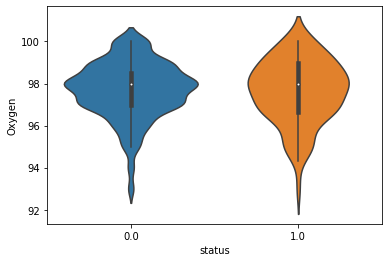

In [26]:
import seaborn as sns
sns.violinplot(data=new_data, x="status", y="Oxygen")

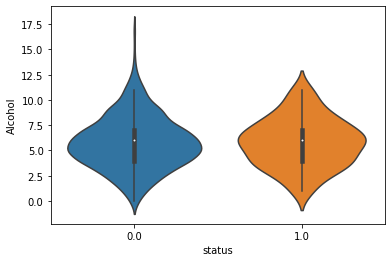

In [27]:
sns.violinplot(data=new_data, x="status", y="Alcohol")

In [28]:
new_data[new_data["Alcohol"] == 17]

,person_id,Blood,Alcohol,Oxygen,Tobacco,Cardiac,status
92,92.0,NaN,17.0,97.666667,4.0,NaN,0.0
970,972.0,NaN,17.0,98.000000,1.0,NaN,0.0


In [29]:
new_data.corr()

,person_id,Blood,Alcohol,Oxygen,Tobacco,Cardiac,status
person_id,1.000000,NaN,-0.035043,-0.013202,-0.041743,NaN,0.013758
Blood,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol,-0.035043,NaN,1.000000,-0.008577,0.014332,NaN,0.002925
Oxygen,-0.013202,NaN,-0.008577,1.000000,0.054908,NaN,-0.012620
Tobacco,-0.041743,NaN,0.014332,0.054908,1.000000,NaN,-0.065955
Cardiac,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,0.013758,NaN,0.002925,-0.012620,-0.065955,NaN,1.000000


In [30]:
new_data.Tobacco.value_counts()

1.0    465
2.0    267
0.0    253
3.0     82
4.0     37
5.0      8
6.0      1
Name: Tobacco, dtype: int64

(array([ 12.,  13.,  33.,  33.,  70., 207., 158., 296., 164., 109.]),
 array([ 93. ,  93.7,  94.4,  95.1,  95.8,  96.5,  97.2,  97.9,  98.6,
         99.3, 100. ]),
 <a list of 10 Patch objects>)

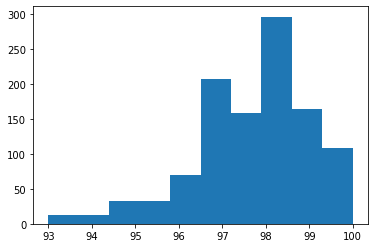

In [31]:
plt.hist(new_data['Oxygen'])